# ***IMPORT LIBRARY***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# ***LOAD DATA***

In [ ]:
from collections import defaultdict
#load data
df = pd.read_csv('/content/cancer patient data sets.csv')

In [ ]:
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
#summary data
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


# ***PREPROSESING DATA***

In [ ]:
# checking for null values
df.isnull().any()

,0
index,False
Patient Id,False
Age,False
Gender,False
Air Pollution,False
Alcohol use,False
Dust Allergy,False
OccuPational Hazards,False
Genetic Risk,False
chronic Lung Disease,False


In [ ]:
# Dropping
col=['index','Patient Id']
df.drop(columns=col,inplace=True,axis=1)

In [ ]:
#Encoding target column
df['Level']=df['Level'].apply(lambda x: 0 if x=='Low' else 1 if x=='Medium' else 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

In [ ]:
#lakukan normalisasi data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# ***EXPLORATORY DATA ANALYSIS***

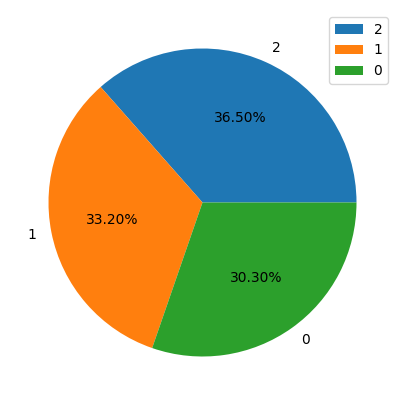

In [ ]:
tdf=df['Level'].value_counts().reset_index()
plt.figure(figsize=(15,5))
plt.pie(x=tdf['count'],labels=tdf['Level'],autopct='%.2f%%')
plt.legend(tdf['Level'])
plt.show()

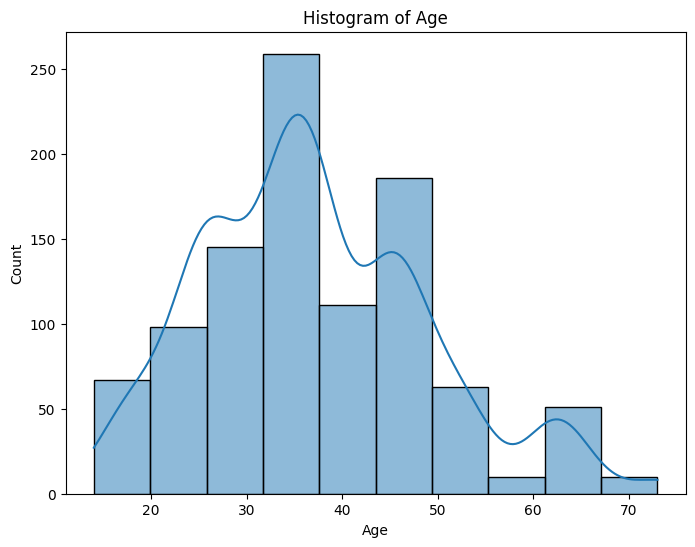

In [ ]:
# Plotting Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Histogram of Age')
plt.show()


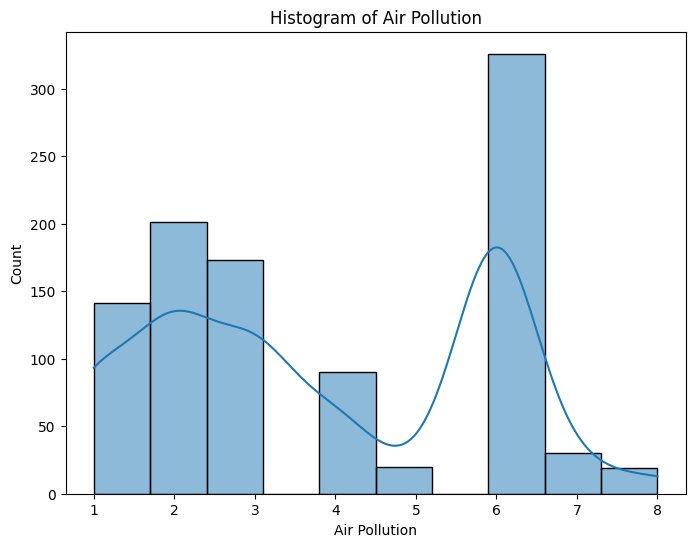

In [ ]:
# Plotting Histogram of Air Pollution
plt.figure(figsize=(8, 6))
sns.histplot(df['Air Pollution'], bins=10, kde=True)
plt.title('Histogram of Air Pollution')
plt.show()


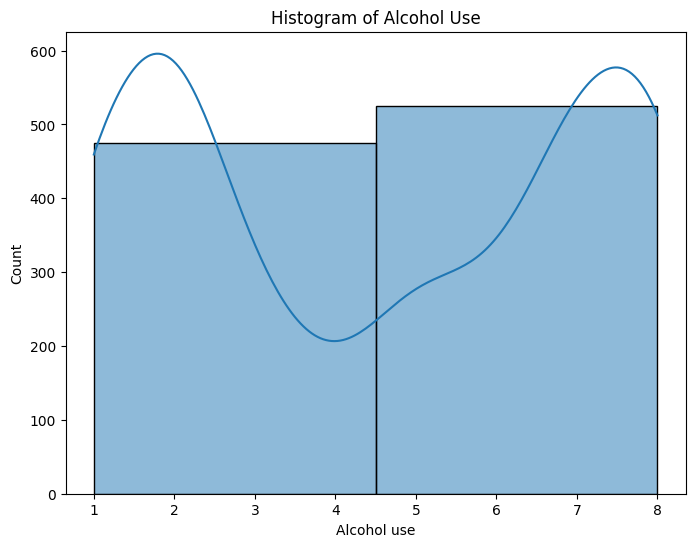

In [ ]:
# Plotting Histogram of Alcohol Use
plt.figure(figsize=(8, 6))
sns.histplot(df['Alcohol use'], bins=2, kde=True)
plt.title('Histogram of Alcohol Use')
plt.show()


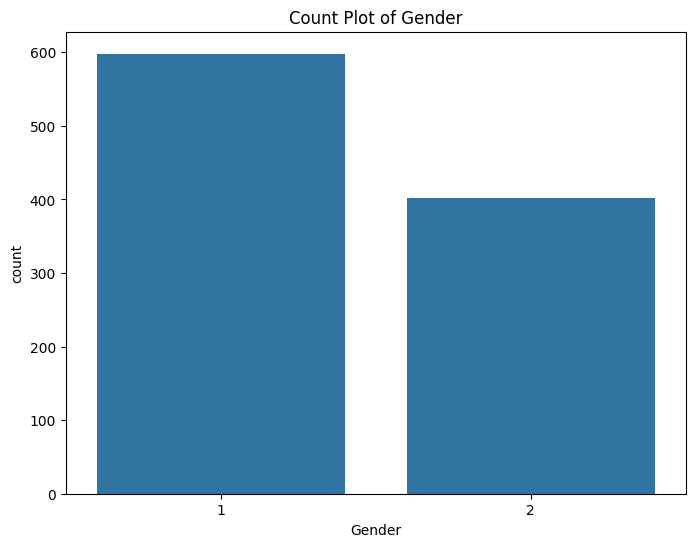

In [ ]:
# Plotting Count Plot of Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Count Plot of Gender')
plt.show()


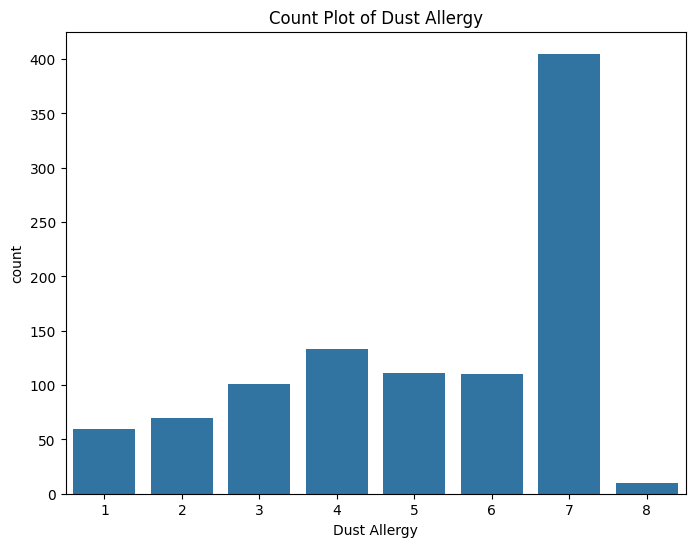

In [ ]:
# Plotting Count Plot of Dust Allergy
plt.figure(figsize=(8, 6))
sns.countplot(x='Dust Allergy', data=df)
plt.title('Count Plot of Dust Allergy')
plt.show()


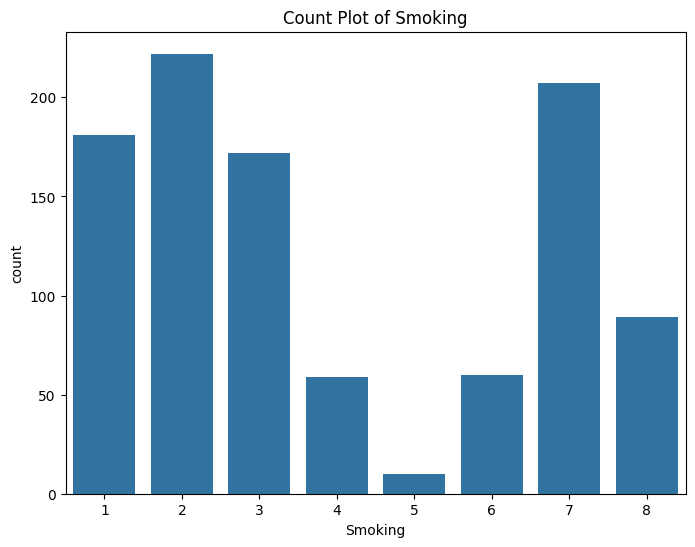

In [ ]:
# Plotting Count Plot of Smoking
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', data=df)
plt.title('Count Plot of Smoking')
plt.show()


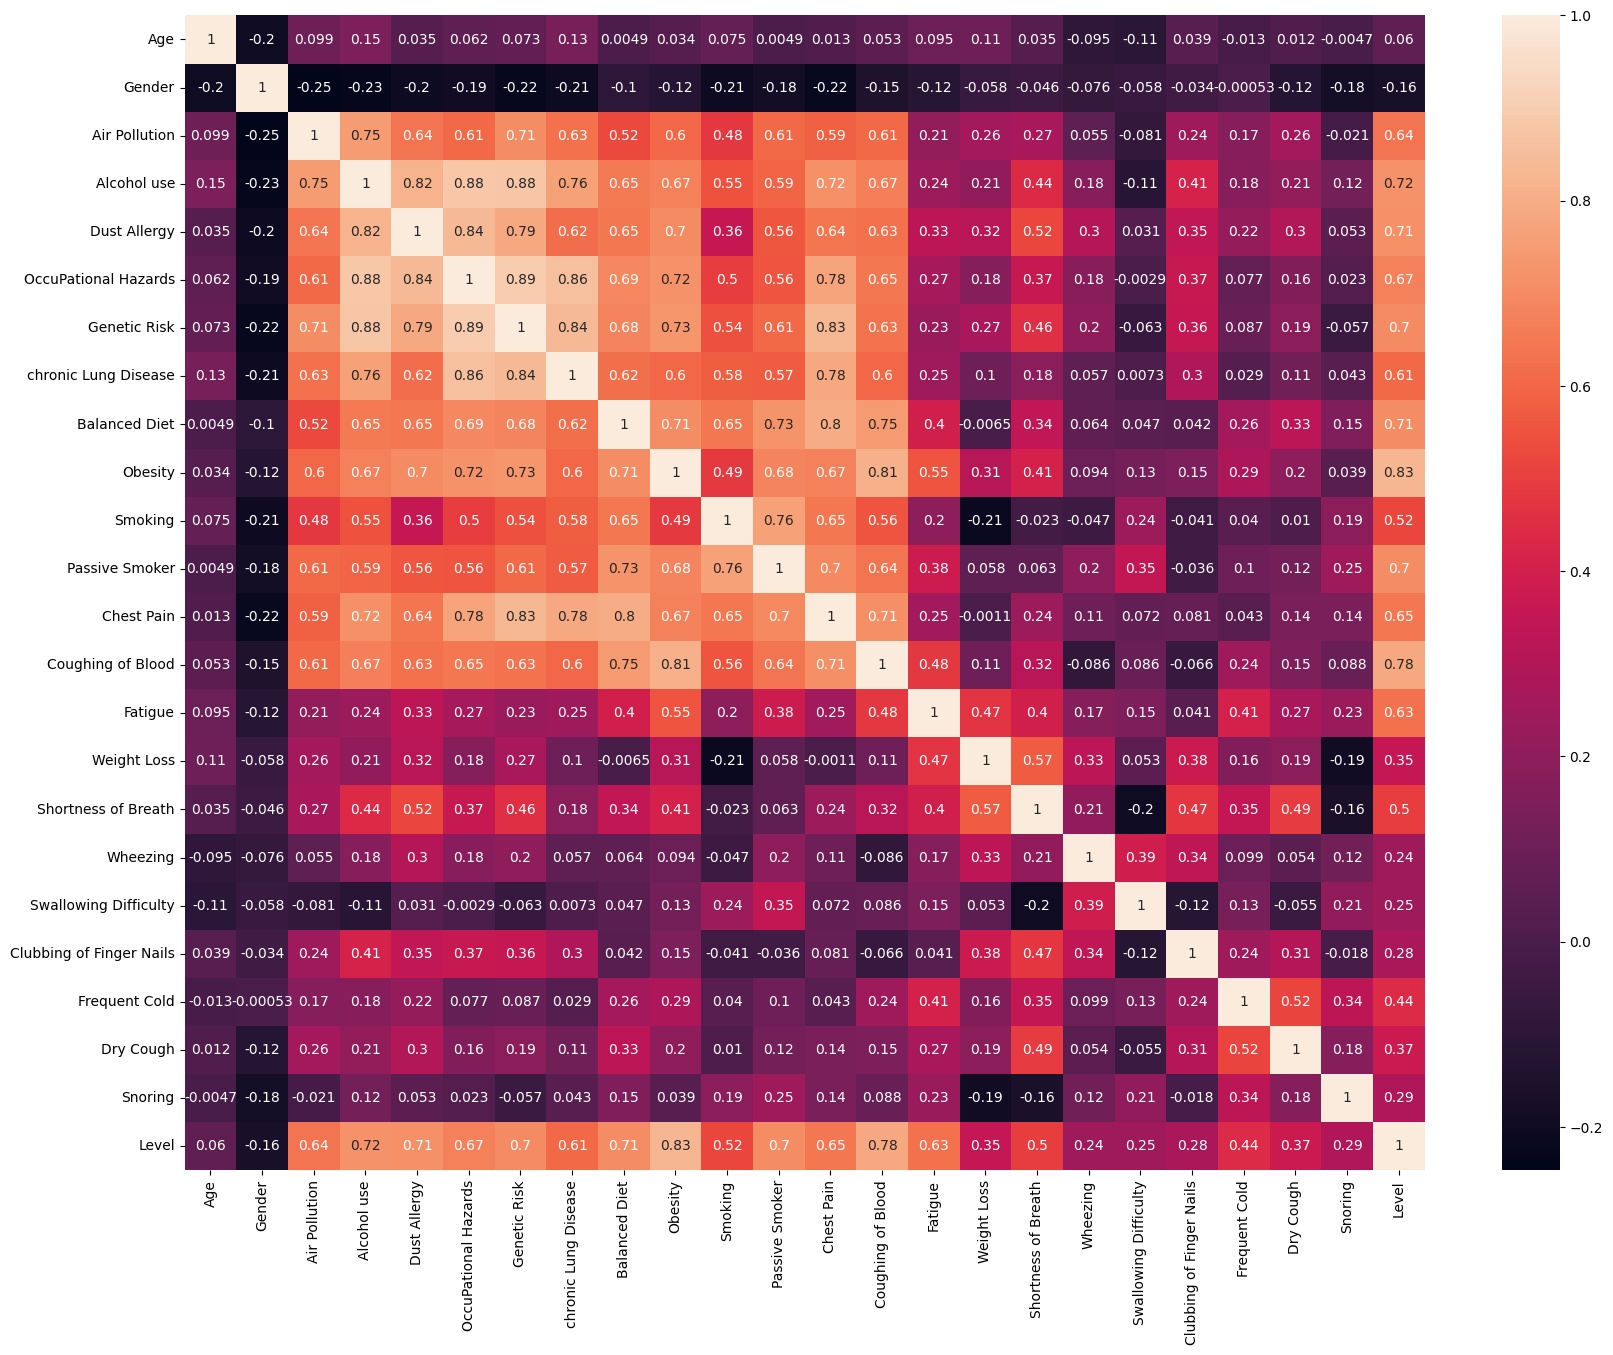

In [ ]:
# Finding correlation between features
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cbar='magma')
plt.show()

In [ ]:
# Splitting the Target column from the original dataset
x=df.drop(columns='Level')
y=df['Level']

# Calculating Mutual Information for capturing both linear and non-linear relationship
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
print(mi_df)

                     Feature  Mutual Information
0          Coughing of Blood            0.606954
1             Passive Smoker            0.596727
2                    Obesity            0.555277
3                Alcohol use            0.545993
4                   Wheezing            0.528768
5                 Chest Pain            0.495838
6              Balanced Diet            0.474088
7               Dust Allergy            0.466387
8        Shortness of Breath            0.422576
9                    Smoking            0.409909
10      OccuPational Hazards            0.402213
11                   Fatigue            0.394815
12              Genetic Risk            0.383282
13             Air Pollution            0.379505
14      chronic Lung Disease            0.378393
15                       Age            0.375920
16  Clubbing of Finger Nails            0.278597
17             Frequent Cold            0.276424
18               Weight Loss            0.236602
19                 D

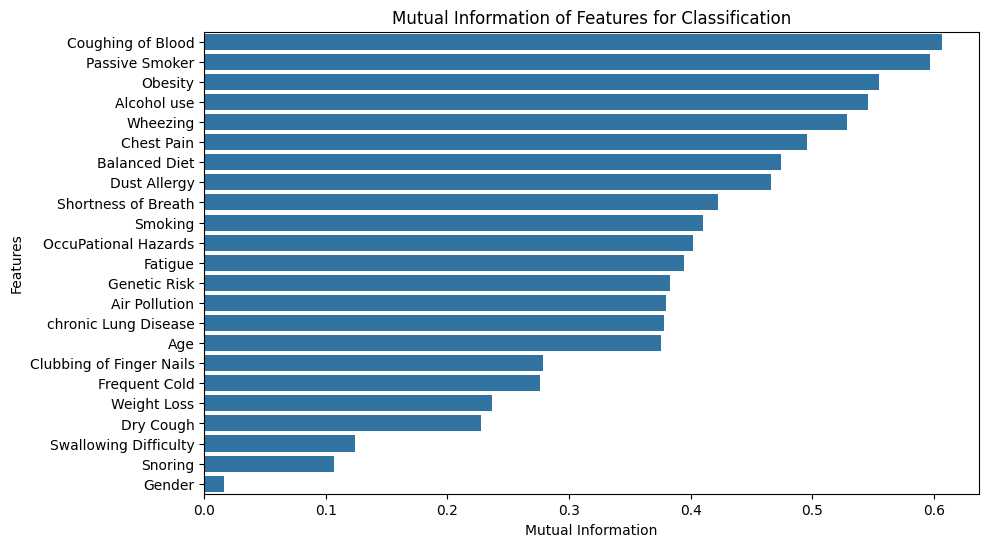

In [ ]:
#Plotting Mutual Information for better understanding
plt.figure(figsize=(10,6))
sns.barplot(x='Mutual Information',y='Feature', data=mi_df)
plt.title('Mutual Information of Features for Classification')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.show()

# Kode ini digunakan untuk memvisualisasikan nilai Mutual Information dari setiap fitur terhadap target dalam bentuk grafik batang horizontal.

# ***MODELLING***

In [ ]:
# Splitting the data into Training (75%) and Testing (25%)
from sklearn.model_selection import train_test_split
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

In [ ]:
#menampilkan jumlah data test dan train
print(x_t.shape,x_te.shape)

(750, 23) (250, 23)


<Axes: xlabel='Level'>

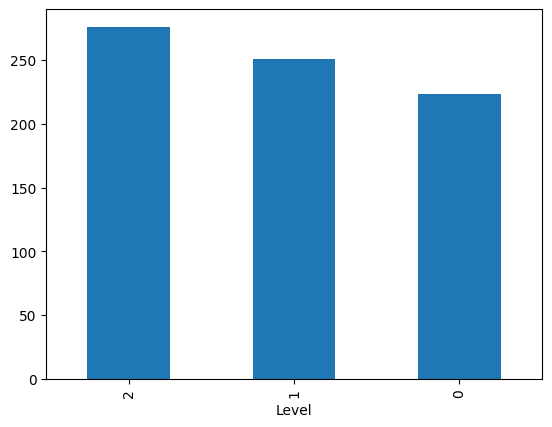

In [ ]:
#menampilkan data train yang ada dilevel dengan bar
y_t.value_counts().plot(kind='bar')

In [ ]:
#melakukan teknik smote undersampling agar data seimbang
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=20)
x_t,y_t=smote.fit_resample(x_t,y_t)

<Axes: xlabel='Level'>

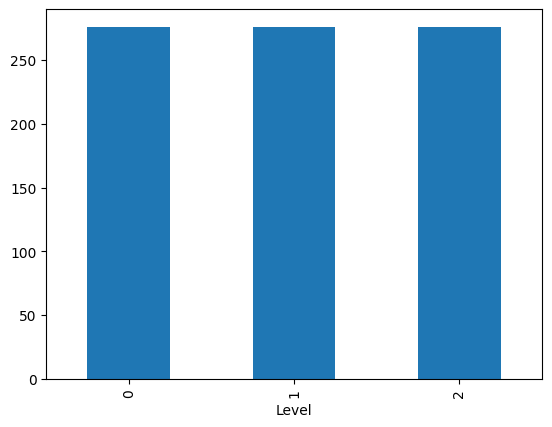

In [ ]:
#menampilkan bar setelah dilakukan smote
y_t.value_counts().plot(kind='bar')

In [ ]:
# Mengimpor library yang dibutuhkan
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

In [ ]:
cm_t=[] #To store confusion matrices for training set
cm=[] #To store confusion matrices for testing set

In [ ]:
ada=AdaBoostClassifier(algorithm='SAMME')
params={
    'n_estimators': [300],
    'learning_rate': np.arange(0.01, 2.01, 0.01),}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)
nada=nada.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


{'n_estimators': 300, 'learning_rate': 0.24000000000000002}
1.0


In [ ]:
pred_train = nada.predict(x_t)
pred_test = nada.predict(x_te)
print('AdaBoost Classifier Training Accuracy: ',accuracy_score(y_t,pred_train))
print('Adaboost Classifier Testing Accuracy: ',accuracy_score(y_te,pred_test))
print('\nClassification Report for Random Forest Classifier Classifier:\n\n ',classification_report(y_te,pred_test))
cmada_t=confusion_matrix(y_t,pred_train)
cm_t.append(cmada_t)
cmada=confusion_matrix(y_te,pred_test)
cm.append(cmada)
cm.append(cmada.tolist())

AdaBoost Classifier Training Accuracy:  1.0
Adaboost Classifier Testing Accuracy:  1.0

Classification Report for Random Forest Classifier Classifier:

                precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        89

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



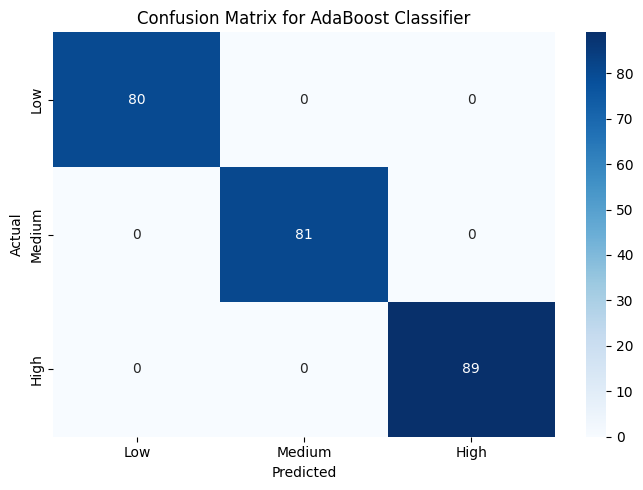

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix untuk AdaBoost
y_pred = nada.predict(x_te) '
cm = confusion_matrix(y_te, y_pred)

# Menentukan label untuk confusion matrix
labels = ['Low', 'Medium', 'High']

# Membuat figure dan axis untuk plot
fig, ax = plt.subplots(figsize=(7, 5))

# Membuat heatmap confusion matrix untuk AdaBoost
sns.heatmap(cm, annot=True, fmt='d', ax=ax, xticklabels=labels, yticklabels=labels, cmap='Blues')

# Memberikan judul pada plot
ax.set_title('Confusion Matrix for AdaBoost Classifier')

# Menambahkan label pada axis
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
#menyimpan model
import pickle
pickle.dump(nada,open('model.pkl','wb'))